<a href="https://colab.research.google.com/github/Ayarol/0090_Assigment1/blob/main/Assignment_1_%E2%80%9CBag%2C_not_bag%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: “Bag, not bag” #

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import random

In [20]:
# Download and extract the dataset.
os.system('curl -fsS http://udon.stacken.kth.se/\~ninjin/comp0090_assignment_1_data.tar.gz -o /tmp/data.tar.gz')
os.system('tar -x -z -f /tmp/data.tar.gz')
os.system('rm -f /tmp/data.tar.gz');

In [21]:
# Then load it into RAM.
trainxs  = np.load("comp0090_assignment_1_data/fashion-train-imgs.npz")
trainys  = np.load("comp0090_assignment_1_data/fashion-train-labels.npz")
devxs   = np.load("comp0090_assignment_1_data/fashion-dev-imgs.npz")
devys   = np.load("comp0090_assignment_1_data/fashion-dev-labels.npz")
testxs  = np.load("comp0090_assignment_1_data/fashion-test-imgs.npz")
testys  = np.load("comp0090_assignment_1_data/fashion-test-labels.npz");

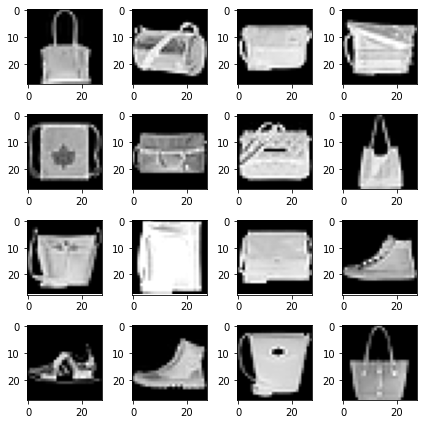

In [ ]:
fig, axes = plt.subplots(4,4,figsize=(6,6))

for i, ax in enumerate(axes.flat, start=1):
    ax.imshow(trainxs[:,:,random.randint(1, np.shape(trainxs)[2])].T,cmap='gray')
plt.tight_layout()
plt.show()

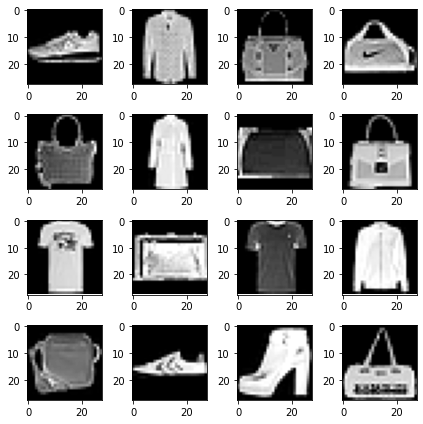

In [ ]:
fig, axes = plt.subplots(4,4,figsize=(6,6))

for i, ax in enumerate(axes.flat, start=1):
    ax.imshow(devxs[:,:,random.randint(1, np.shape(devxs)[2])].T,cmap='gray')
plt.tight_layout()
plt.show()

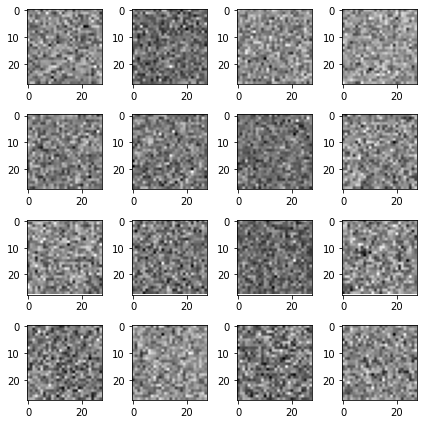

In [ ]:
fig, axes = plt.subplots(4,4,figsize=(6,6))

for i, ax in enumerate(axes.flat, start=1):
    ax.imshow(testxs[:,:,random.randint(1, np.shape(testxs)[2])].T,cmap='gray')
plt.tight_layout()
plt.show()

## Assignment Q1: A memory-efficient voted perceptron ##

1. Derive a variant of the voted perceptron with memory complexity O(1) – informally, that
the memory usage remains constant regardless of the number of updates.
[[Q1.1](#q1-1)]
2. Prove that your efficient variant is functionally equivalent to the voted perceptron.[[Q1.2](#q1-2)]
3. Implement your efficient variant in your Colaboratory notebook.[[Q1.3](#q1-3)]
4. Train your model to convergence on the training set.[[Q1.4](#q1-4-5)]
5. Provide a plot of the accuracy on the training set for each epoch.[[Q1.5](#q1-4-5)]
6. Provide the accuracy on the training and validation set, for the epoch on which you obtain your highest accuracy on the validation set.[[Q1.6](#q1-6)]



$\begin{align}&Vote\space perceptron \space algorithm\space (bias\space omitted)\\&Data:  D := {(x_1, y_1), . . . , (x_n, y_n)}
\\&Result:v := \{(w_1, c_1), . . . , (w_k, c_k)\}
\\&w_1:=0^d\\&c_1:=0\\&k:=1
\\&while \space not \space coverged\space do 
\\&\quad for \space i:=1\cdots,n \space do
\\&\quad\quad\hat y:=\begin{cases}1\quad w_kx_i \ge 0
\\0 \quad otherwise \end{cases}
\\&\quad\quad\quad if\space \hat y = y \space then
\\&\quad\quad\quad\quad c_k:=c_k+1
\\&\quad\quad\quad else
\\&\quad\quad\quad\quad w_{k+1}:=w_k+(y-\hat y)x_i
\\&\quad\quad\quad\quad c_{k+1}:=1
\\&\quad\quad\quad\quad k:=k+1
\\&\quad\quad\quad end
\\&\quad end
\\& end
\end{align}$

Vote perceptron generate serveral predictor vector as $v: \{(w_k,c_k)\}$  
<br>1.Each **v** contains a **weight (w)**, and a number of **correct times (c)**.
<br>2.Keep using the same predictor vector until it makes mistakes.
<br>3.**k** is decided by the number of mistakes durning training.
<br>4.This perceptron will generate **k predictor vectors** at the end.
<br>5.Perdictor vector with high **c** has high weight in prediction.



<a name='q1-1'></a>
#####Q1.1
$\begin{align}&Memory-efficient\space voted\space perceptron \space algorithm\space (bias\space omitted)\\&Data:  D := {(x_1, y_1), . . . , (x_n, y_n)}
\\&Result:\bar w
\\&w:=0^d\\&c:=[0,0]\\&\bar w:=0^d
\\&while \space not \space coverged\space do 
\\&\quad for \space i:=1\cdots,n \space do
\\&\quad\quad\quad \hat y:=\begin{cases}1\quad w_kx_i \ge 0
\\0 \quad otherwise \end{cases}
\\&\quad\quad\quad if\space \hat y \ne y \space then
\\&\quad\quad\quad\quad \bar w:=\bar w+w*(c[1]-c[0])
\\&\quad\quad\quad\quad w:=w+(y-\hat y)x_i
\\&\quad\quad\quad\quad c[0] :=c[1]
\\&\quad\quad\quad end
\\&\quad\quad\quad c[1]:=c[1]+1
\\&\quad end
\\& end
\\&\bar w = \bar w/c
\end{align}$


**The varant of the voted perceptron with memory compexity O(1) is:**
$f(x) = sign(\sum^K_{k=1}c^k(w^kx))= sign(\bar wx)$

<a name='q1-2'></a>

####Q1.2
$
\begin{align}&The\space label\space \hat y \space for\space Voted\space perceptron\space denote: \\&f(x) = \begin{cases}1 \quad\quad [\sum^k_{i:=1}c_i(w_i x)] \ge0\\
0 \quad \quad otherwise\end{cases}\\& \approx sign([\sum^k_{i:=1}c_i(w_i x)])\\&Set\space s= \sum^k_{i:=1}c_i(w_i x) = \sum^k_{i:=1}(c_iw_i) x
\end{align}$
<br>Voted perceptron claassifies result by all the prediction verctors($w$) in training.  
<br>$c_i$is the number of votes for $w_i$.
<br>$c_iw_i =\overbrace{w_i+w_i+\cdots+w_i}^{c_i}$
<br>If i = 1,$v_1$ is correct from data $x_1$ to $x_c$.
<br>The number of data is n. Suppose the number of epoches is T. There are **n*T data** are training in all. 
$\begin{align}&\sum ^k_{i:=1}(c_iw_i) = \overbrace{w_1+\cdots+w_1}^{c_1}+\overbrace{w_2+\cdots+w_2}^{c_2}+\cdots+\overbrace{w_k+\cdots+w_k}^{c_k} \\&= \overbrace {w_1+w_1+\cdots+w_k+w_k}^{n*T} \\&= n*T*\frac{\overbrace {w_1+w_1+\cdots+w_k+w_k}^{n*T}}{n*T}
=nT\bar w 
\\&s = nT\bar wx \quad \space nT>0,
\\&\begin{cases}&nT\bar w< 0\quad \bar w<0
\\&nT\bar w\ge 0 \quad \bar w\ge 0
\end{cases} \\& Thus,sign(s) = sign(nT \bar w x) = sign(\bar wx)
\end{align}$





<a name='q1-3'></a>

#### Q1.3

In [43]:
# Implement your efficient variant in your Colaboratory notebook.
class Mean_voted_perceptron():
  '''
  validate_accuracy:   list (validate data accuracy)
  accuracy:       list (training accuracy)
  train_num:       int   (number of training set)
  valid_num:       int   (number of validation set)
  validate_xs:      ndarray (validation data)
  validate_ys:      ndarray (validation label)
  train_xs:        ndarray  (training data)
  train_ys:        ndarray  (traning label)
  weight:         ndarray (weight for each data)
  weight_bar:       ndarray (mean weight)
  bias:          float
  bias:          float
  '''
  def __init__(self):
    self.validate_accuracy = []
    self.accuracy =[]   
    
  '''
  Param: 
  f   int(the size of data feature)
  initial weight to n*m zeros
  '''
  def init_weight(self,f):
    self.weight = np.zeros(f)
    self.weight_bar = np.zeros(f)
    self.bias = 0.0;
    self.bias_bar = 0.0;

  '''
  Param：
  xs  ndarray(all data)
  Flatten all input data

  return:
  xs: flatten data
  '''
  def reshape(self,xs, init_w=False):
    nd = np.shape(xs)
    f = 1
    # compute the size of flatten data
    for d in nd[:-1]:
      f *=d 
    # whether need to init weight
    if init_w:
      self.init_weight(f)
    # flatten dataset xs
    xs = np.array([np.reshape(xs[...,i],f) for i in range(nd[-1])]) 
    return xs

  '''
    Param: 
    xs     ndarray  (total dataset)
    ys     ndarray  (total label)
    trainset  float   (divide line for validation set)
    
    intital data and divide data to training set and validation set
  '''
  def init_data(self,xs,ys,val_xs,val_ys):
    self.train_num = int(np.shape(xs)[-1])
    self.valid_num = int(np.shape(val_xs)[-1])
    self.train_xs = self.reshape(xs, True)
    self.train_ys = ys
    self.validate_xs =self.reshape(val_xs)
    self.validate_ys = val_ys

  '''
    Param: 
    w_x     ndarray  (W.T@X_i )
    The activation unit-signum
    return 1 if sum of W.T@X greater or equal to 0
        0 if sum of W.T@X less than 0
  '''
  def signum(self, w_x):
    if(w_x >= 0):
      return 1
    return 0

  '''
  Param: 
  xs       ndarray (dataset X)
  ys       ndarray (label Y)     
  cur_weight   ndarray(weight for current epoch)
  cur_bias    int(bias for current epoch)
  predict dataset X's label

  return y_hat
  '''
  def predict(self,xs,ys,cur_weight=None,cur_bias =0.0):
    correct = 0
    # check whether the training is over
    if cur_weight is None:
      cur_weight = self.weight_bar
      cur_bias = self.bias_bar  
    # predict all validation data                 
    for x,y in zip(xs, ys):   
      y_hat = self.signum(cur_weight.T@x+ cur_bias)
      if y_hat == y:
        correct += 1    
    # count accuracy
    acc = correct/np.shape(xs)[0] 
    return acc

  '''
  Param:
  xs:     ndarray
  ys:     ndarray
  val_xs:   ndarray
  val_ys:   ndarray
  epoch:    int

  Use mean voted perceptron to train model 
  Total_weight keep add weight for each data to the end
  Calculate mean weight at the end
  '''
  def train(self, xs, ys,val_xs,val_ys ,epoch=50):                
    self.init_data(xs,ys,val_xs,val_ys)
    #initial total mean weight and mean bias               
    t_w = self.weight_bar
    t_b = self.bias_bar
    #count start index and the end index of w_i 
    c = [0,0]
    
    for _ in range(epoch):
      # initial correct counter in each epoch
      correct = 0
      for x,y in zip(self.train_xs,self.train_ys):
        # compute y_hat    
        y_hat =self.signum(self.weight.T@x+self.bias)
        # update weight and mean weight as misjudgment
        if y_hat == y:               
          # count correct prediction
          correct +=1 
        else:
          delta_c = c[1]-c[0]
          # update total weight and bias c * current weight

          t_w += self.weight*delta_c        
          t_b +=  self.bias*delta_c
          # update weight and bias
          
          self.weight += (y-y_hat)*x  
          self.bias += (y-y_hat)
          # count number of w_i+1
          c[0] = c[1]
        # update the number of x               
        c[1]+=1
      # count accuracy
      acc = correct/self.train_num              
      self.accuracy.append(acc)
      # count validation accuracy for each epoch
      val_acc = self.validate(c[1],t_w,t_b)   
      #Check converge or not                 
      if(acc==1):
        print("Accuracy is 100%. Converged.")
        break
      elif(len(self.validate_accuracy)>10):
        if(all(cur_acc == self.validate_accuracy [-10] for cur_acc in self.validate_accuracy [-10:])):
          print("Validation accuracy is not changed for 10 epoches.")
          print("Epoch {} training accuracy {:1.3f}%, validation accuracy {:1.3f}%".format(_,acc*100,val_acc*100))
          break
    # mean_weight = total_weight/(training_number*epoch_number)
    self.weight_bar =t_w/c[1] 
    # mean_bias = total_bias/(training_number*epoch_number)
    self.bias_bar = t_b/c[1]

  '''
  Param:
  counter: int(n*epoches) 
  t_w:  ndarray(total weight)
  t_b:  ndarray(total bias)
  Test mean weight model in validation data in each epoch
  And calculate accuracy

  return acc:   float (validation accuracy)
  '''
  def validate(self,counter,t_w,t_b):
    # count mean weight for this epoch
    cur_weight = t_w/counter   
    cur_bias = t_b/counter
    
    acc = self.predict(self.validate_xs,self.validate_ys
                 ,cur_weight,cur_bias)     
    self.validate_accuracy.append(acc)
    return acc

#Provide a plot of the accuracy on the training set for each epoch.
#Provide the accuracy on the training and validation set, for the epoch on which you obtain your highest accuracy on the validation set.

<a name='q1-4-5'></a>

#### Q1.4-5

Validation accuracy is not changed for 10 epoches.
Epoch 39 training accuracy 96.692%, validation accuracy 97.600%


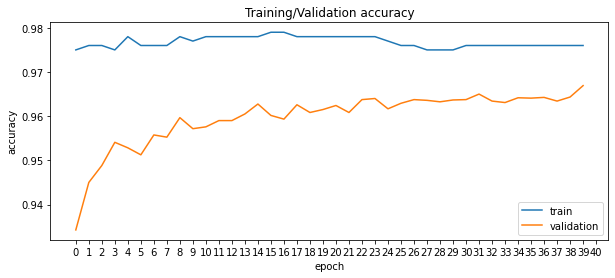

In [44]:
perceptron = Mean_voted_perceptron()
epoch =50
#train model
perceptron.train(trainxs,trainys,devxs,devys,epoch = epoch)
#get train accuracy and validation accuracy
v_acc = np.array(perceptron.validate_accuracy)
t_acc = perceptron.accuracy
#reset epoch if coveraged before reach 50
epoch = len(v_acc)
x_axis = [*range(0,epoch+1)]
# plot validation accuracy and train accuracy
plt.figure(figsize=(int(epoch/4),4))
plt.plot(v_acc)
plt.plot(t_acc)
plt.title("Training/Validation accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks(x_axis)
plt.legend(["train","validation"])
plt.show()

<a name='q1-6'></a>

#### Q1.6

In [42]:
index_highest_acc_validation = np.unravel_index(np.argmax(v_acc, axis=None), v_acc.shape)[0]
print("Epoch of highest validation accuracy:  {}\nValidation acc:  {:1.3f}%\nTrain acc: {:1.3f}%".format(
    index_highest_acc_validation ,v_acc[index_highest_acc_validation]*100,
    t_acc[index_highest_acc_validation]*100))

Epoch of highest validation accuracy:  15
Validation acc:  97.900%
Train acc: 96.017%


In [27]:
"""correct = 0
xs_test = perceptron.reshape(testxs)
perceptron.predict(xs_test,testys)"""

'correct = 0\nxs_test = perceptron.reshape(testxs)\nperceptron.predict(xs_test,testys)'

## Assignment 1.2: Mean squared-loss logistic regression ##

To be completed.

## Assignment 1.3: Three-layer multi-layer perceptron ##

To be completed.

## Assignment 1.4: Hyperparameter tuning ##

To be completed.

## Assignment 1.5: Model shootout ##

To be completed.